<a href="https://colab.research.google.com/github/riana03/PZSIB-5/blob/main/Assessment_2_Riana_Oktafianti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
# Import modul
import pandas as pd
import matplotlib
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Mendefinisikan URL dari data
data_url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt"

# Membaca data dari URL
df = pd.read_csv(data_url, delim_whitespace=True, comment="#", header=None, names=["Decimal Date", "CO2 Level", "Deseasonalized", "Days", "Standard Deviation of Days", "Unf. of Mon Mean"])
df.head()

Decimal Date  CO2 Level  Deseasonalized  Days  \
1958 3     1958.2027     315.70          314.43    -1   
     4     1958.2877     317.45          315.16    -1   
     5     1958.3699     317.51          314.71    -1   
     6     1958.4548     317.24          315.14    -1   
     7     1958.5370     315.86          315.18    -1   

        Standard Deviation of Days  Unf. of Mon Mean  
1958 3                       -9.99             -0.99  
     4                       -9.99             -0.99  
     5                       -9.99             -0.99  
     6                       -9.99             -0.99  
     7                       -9.99             -0.99

# Data Understanding

In [ ]:
# Melihat lima baris teratas pada dataframe
df.head(5)

Decimal Date  CO2 Level  Deseasonalized  Days  \
1958 3     1958.2027     315.70          314.43    -1   
     4     1958.2877     317.45          315.16    -1   
     5     1958.3699     317.51          314.71    -1   
     6     1958.4548     317.24          315.14    -1   
     7     1958.5370     315.86          315.18    -1   

        Standard Deviation of Days  Unf. of Mon Mean  
1958 3                       -9.99             -0.99  
     4                       -9.99             -0.99  
     5                       -9.99             -0.99  
     6                       -9.99             -0.99  
     7                       -9.99             -0.99

In [ ]:
# Melihat daftar nama kolom dari dataframe
df.columns

Index(['Decimal Date', 'CO2 Level', 'Deseasonalized', 'Days',
       'Standard Deviation of Days', 'Unf. of Mon Mean'],
      dtype='object')

Data terdiri dari 6 data kategorik (object) yaitu decimale date, CO2 level, deseasonalized, days, standard deviation of days, dan unf.of mon mean.

In [ ]:
# Melihat informasi rinci pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 787 entries, (1958, 3) to (2023, 9)
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Decimal Date                787 non-null    float64
 1   CO2 Level                   787 non-null    float64
 2   Deseasonalized              787 non-null    float64
 3   Days                        787 non-null    int64  
 4   Standard Deviation of Days  787 non-null    float64
 5   Unf. of Mon Mean            787 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 41.4 KB


Terdapat 6 data yang terdiri dari 2 tipe data yaitu tipe float (decimale date, co2 level, deseasonalized, standard deviation of days, unf.of mon mean) dan tipe int (days). Artinya keenam data ini berisi data numerik.

In [ ]:
# Menghitung jumlah nilai unik pada setiap kolom dataframe
df.nunique()

Decimal Date                  787
CO2 Level                     766
Deseasonalized                759
Days                           25
Standard Deviation of Days     88
Unf. of Mon Mean               45
dtype: int64

In [ ]:
# Ringkasan statistik deskriptif pada kolom numerik
df.describe()

,Decimal Date,CO2 Level,Deseasonalized,Days,Standard Deviation of Days,Unf. of Mon Mean
count,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000
mean,1990.957709,358.467510,358.459479,19.006353,-2.112605,-0.100521
std,18.945122,31.175522,31.110256,12.033190,4.542438,0.513548
min,1958.202700,312.430000,314.430000,-1.000000,-9.990000,-0.990000
25%,1974.583350,330.115000,330.470000,8.500000,0.155000,0.060000
50%,1990.958300,354.420000,355.110000,25.000000,0.390000,0.150000
75%,2007.333350,383.765000,383.755000,28.000000,0.560000,0.210000
max,2023.708300,424.000000,422.020000,31.000000,1.310000,0.580000


# Data Cleaning


In [ ]:
# Mengecek data NaN (data kosong)
data_nan = df.isnull().sum()
for col in list(data_nan.keys()):
    perc = np.round(data_nan[col] * 100 / len(df), 2)
    print(col + ': ' + str(perc) + '%')

Decimal Date: 0.0%
CO2 Level: 0.0%
Deseasonalized: 0.0%
Days: 0.0%
Standard Deviation of Days: 0.0%
Unf. of Mon Mean: 0.0%


Tidak terdapat data kosong (NaN) sehingga tidak perlu remove atau fill data NaN yang ditunjukkan dengan presentase 0.0% disetiap data

# Exploratory Data Analysis

In [ ]:
# Melihat sepuluh baris teratas pada dataframe
df.head(10)

Decimal Date  CO2 Level  Deseasonalized  Days  \
1958 3      1958.2027     315.70          314.43    -1   
     4      1958.2877     317.45          315.16    -1   
     5      1958.3699     317.51          314.71    -1   
     6      1958.4548     317.24          315.14    -1   
     7      1958.5370     315.86          315.18    -1   
     8      1958.6219     314.93          316.18    -1   
     9      1958.7068     313.20          316.08    -1   
     10     1958.7890     312.43          315.41    -1   
     11     1958.8740     313.33          315.20    -1   
     12     1958.9562     314.67          315.43    -1   

         Standard Deviation of Days  Unf. of Mon Mean  
1958 3                        -9.99             -0.99  
     4                        -9.99             -0.99  
     5                        -9.99             -0.99  
     6                        -9.99             -0.99  
     7                        -9.99             -0.99  
     8                        -9.99             -0.99  
     9                        -9.99             -0.99  
     10                       -9.99             -0.99  
     11                       -9.99             -0.99  
     12                       -9.99             -0.99

## Analisis Univariate Level CO2

In [ ]:
# Statistik deskriptif
mean_CO2 = np.mean(df["CO2 Level"])
median_CO2 = np.median(df["CO2 Level"])
mode_CO2 = stats.mode(df["CO2 Level"])
variance_CO2 = np.var(df["CO2 Level"])
std_dev_CO2 = np.std(df["CO2 Level"])
percentile_CO2_25 = np.percentile(df["CO2 Level"], 25)
percentile_CO2_75 = np.percentile(df["CO2 Level"], 75)
data_range_CO2 = np.ptp(df["CO2 Level"])

print("Mean/Rata-rata:", mean_CO2)
print("Median/Nilai tengah:", median_CO2)
print("Mode/Modus:", mode_CO2[0])
print("Variasi:", variance_CO2)
print("Standard Deviasi:", std_dev_CO2)
print("Kuartil pertama:", percentile_CO2_25)
print("Kuartil ketiga:", percentile_CO2_75)
print("Rentang data:", data_range_CO2)

Mean/Rata-rata: 358.4675095298603
Median/Nilai tengah: 354.42
Mode/Modus: 336.14
Variasi: 970.6781854112816
Standard Deviasi: 31.155708713031736
Kuartil pertama: 330.115
Kuartil ketiga: 383.765
Rentang data: 111.57


Dari statistik deskriptif level CO2, dapat disimpulkan bahwa level karbon dioksida memiliki variasi nilai yang cukup signifikan dengan standar deviasi sekitar 31.16 ppm. Modus yang lebih rendah daripada mean dan median menunjukkan adanya tingkat karbon dioksida yang lebih rendah pada waktu tertentu. Persebaran data disekitar median juga dapat diketahui dengan kuartil pertama dan kuartil ketiga, sedangkan rentang data sebesar 111.57 menunjukkan perubahan yang signifikan pada tahun 1960-2023.

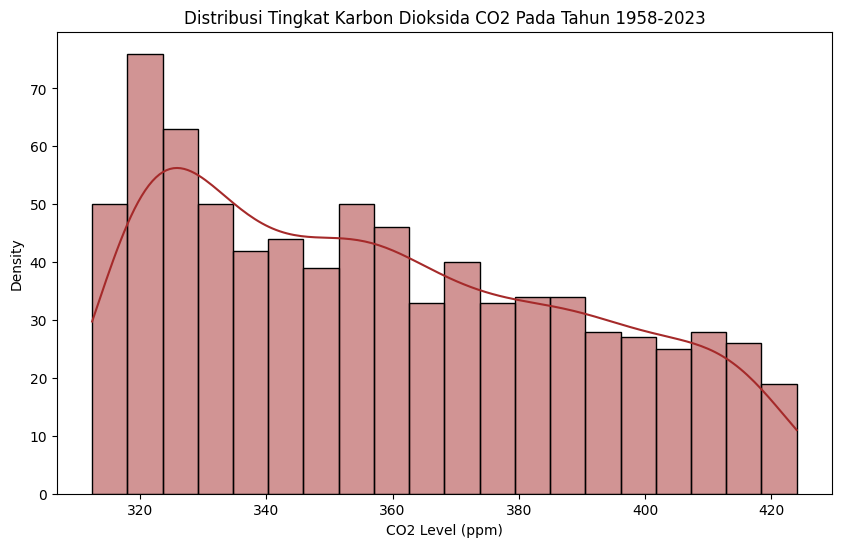

In [ ]:
# Membuat histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["CO2 Level"], kde=True, color="brown", bins=20)
plt.title("Distribusi Tingkat Karbon Dioksida CO2 Pada Tahun 1958-2023")
plt.xlabel("CO2 Level (ppm)")
plt.ylabel("Density")
plt.show()

Histogram di atas menunjukkan distribusi tingkat karbon dioksida dalam ppm dari tahun 1958 sampai 2023. Data yang digunakan adalah data numerik yaitu level karbon dioksida. Sumbu y adalah density yang menunjukkan seberasa sering level karbon dioksida muncul dalam dataframe sehingga dengan visualisasi histogram ini memberikan gambaran mengenai persebaran data level karbon dioksida yang dapat dianalisis lebih lanjut dibawah ini.

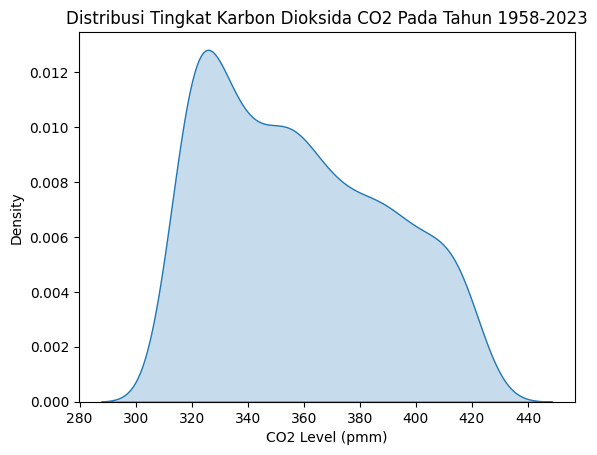

In [ ]:
# Kurva kepadatan Level CO2
sns.kdeplot(df["CO2 Level"], fill=True)
plt.title("Distribusi Tingkat Karbon Dioksida CO2 Pada Tahun 1958-2023")
plt.xlabel("CO2 Level (pmm)")
plt.ylabel("Density")
plt.show()

In [ ]:
# Menghitung skewness dan kurtosis
skewness_CO2 = stats.skew(df["CO2 Level"])
kurtosis_CO2 = stats.kurtosis(df["CO2 Level"])

print("Skewness:", skewness_CO2)
print("Kurtosis:", kurtosis_CO2)

Skewness: 0.36300326281049144
Kurtosis: -1.0508106149405918


Skewness menunjukkan kemiringan kurva dan kurtosis menunjukkan keruncingan kurva. Level CO2 dapat digambarkan dengan kurva distribusi level CO2 diatas. Kurva tersebut dapat dianalisis bahwa kemiringan kurva sebesar 0.36 (bernilai positif) yang berarti nilai level CO2 lebih terkonsentrasi ke sisi kanan dan ekor kiri menyebar (mean>median>modus). Kurtosis yang memiliki nilai < 3 menunjukkan distribusi memiliki puncak yang hampir mendatar (platikurtik).

<Axes: xlabel='CO2 Level'>

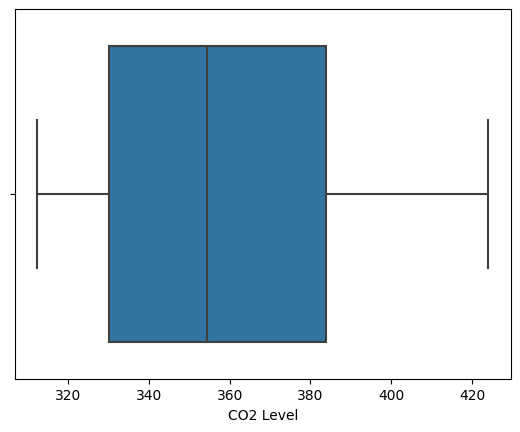

In [ ]:
# Membuat boxplot level CO2
sns.boxplot(data=df, x="CO2 Level")

Berdasarkan boxplot diatas dapat terlihat bahwa pada data level CO2 tidak ditemukan ourlier. Boxplot juga menunjukkan nilai minimum (312.43 ppm), nilai kuartil pertama (330.45 ppm), nilai median (354.42 ppm), nilai kuartil ketiga (383.765 ppm), dan nilai maksimum (422 ppm).

## Analisis Bivariate Level CO2

In [ ]:
# Membuat grafik garis dengan Plotly Express
fig = px.line(df, x="Decimal Date", y="CO2 Level", title="Tingkat Karbon Dioksida Pada Tahun 1958-2023")
fig.update_xaxes(title_text="Tahun")
fig.update_yaxes(title_text="Level CO2 (ppm)")
fig.show()

Grafik diatas menunjukkan pengukuran level karbon dioksida rata-rata bulanan pada tahun 1958-2023 dalam satuan ppm. Pada sumbu x menunjukkan tahun dan sumbu y adalah level karbon dioksida. Pada grafik terjadi naik dan turun (puncak dan lembah kecil pada garis grafik) yang dipengaruhi oleh pertumbuhan vegetasi musim panas di belahan bumi utara yang mengurangi karbon dioksida di atmosfer dan pembusukan di musim dingin yang meningkatkan karbon dioksida di atmosfer. Tren yang terlihat dalam grafik (peningkatan karbon dioksida seiring waktu) dipengaruhi oleh banyaknya aktivitas manusia terutama karena penggunaan bahan bakar fosil untuk menghasilkan energi.


Untuk lebih jelasnya lagi melihat puncak (naik) dan lembah (turun) pada grafik bisa dilihat pada visualisasi data berikut.

In [ ]:
# Memfilter data untuk beberapa tahun terakhir
data_5_tahun = df[df["Decimal Date"] >= 2018]

# Buat grafik garis dengan Plotly Express
fig = px.line(data_5_tahun, x="Decimal Date", y="CO2 Level", title="Tingkat Karbon Dioksida Pada Tahun 2018-2023")
fig.update_xaxes(title_text="Tahun")
fig.update_yaxes(title_text="Level CO2 (ppm)")
fig.show()

## Regresi Linear

In [ ]:
# Melihat lima baris teratas pada dataframe untuk data Decimal Date dan CO2 Level
data = df[["Decimal Date","CO2 Level"]]
data.head(3)

Decimal Date  CO2 Level
1958 3     1958.2027     315.70
     4     1958.2877     317.45
     5     1958.3699     317.51

In [ ]:
# Mengganti nama kolom menjadi x dan y
data.columns = ["x","y"]
data.head()

x       y
1958 3  1958.2027  315.70
     4  1958.2877  317.45
     5  1958.3699  317.51
     6  1958.4548  317.24
     7  1958.5370  315.86

*   x = Decimal date
*   y = CO2 Level



In [ ]:
# Menghitung rata-rata x dan y
data["x"].mean(), data["y"].mean()

(1990.9577091486658, 358.4675095298603)

In [ ]:
# Menentukan Regresi Linear secara matematis
data.loc[:, "x"] = data.x.values.reshape(-1, 1)
data.loc[:, "y"] = data.y.values.reshape(-1, 1)
data["(x-x_mean)"] = data["x"] - data["x"].mean()
data["(y-y_mean)"] = data["y"] - data["y"].mean()
data["(x-x_mean)(y-y_mean)"] = data["(x-x_mean)"] * data["(y-y_mean)"]
data["pow((x-x_mean),2)"] = np.round(np.power(data["x"] - data["x"].mean(), 2), 2)
data.head()


<ipython-input-250-2376e11208ce>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-250-2376e11208ce>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-250-2376e11208ce>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-250-237

x       y  (x-x_mean)  (y-y_mean)  (x-x_mean)(y-y_mean)  \
1958 3  1958.2027  315.70  -32.755009   -42.76751           1400.850166   
     4  1958.2877  317.45  -32.670009   -41.01751           1340.042412   
     5  1958.3699  317.51  -32.587809   -40.95751           1334.715504   
     6  1958.4548  317.24  -32.502909   -41.22751           1340.013997   
     7  1958.5370  315.86  -32.420709   -42.60751           1381.365674   

        pow((x-x_mean),2)  
1958 3            1072.89  
     4            1067.33  
     5            1061.97  
     6            1056.44  
     7            1051.10

*   x-x_mean (selisih antara nilai x (variabel independen) dengan x mean) yang menunjukkan seberapa jauh setiap nilai x dari rata-rata x. Untuk menentukan koefisien regresi (slope).
*   y-y_mean (selisih antara nilai y (variabel dependen) dengan y mean) yang menunjukkan seberapa jauh setiap nilai y dari rata-rata y. Untuk menentukan koefisien regresi (slope).
*   (x-x_mean)(y-y_mean) adalah hasil perkalian dari perbedaan antara x dengan x rata-rata dan perbedaan antara y dengan y rata-rata. Untuk menentukan koefisien regresi (slope).
*   pow((x-x_mean),2) adalah perhitungan kuandrat antara perbedaan x dengan x rata-rata guna menentukan koefisien regresi (slope).
*   y_pred menunjukkan nilai-nilai prediksi yang dihasilkan oleh model regresi linier yang dapat diperoleh dengan  b0 + b1(nilai x) dimana b0 adalah intersept dan b1 adalah slope.







In [ ]:
#Rumus menghitung slope (b1)
b1 = data["(x-x_mean)(y-y_mean)"].sum() / data["pow((x-x_mean),2)"].sum()
print("b1 =", b1)

b1 = 1.6260727679124443


Slope adalah koefisien regresi untuk variabel independen (x). Slope menunjukkan rata-rata penambahan atau pengurangan pada variabel x (tahun) untuk setiap peningkatan satu satuan variabel y (level CO2).

In [ ]:
# Menghitung intercept (b0)
b0 = data["y"].mean() - b1 * data["x"].mean()
print("b0 =", b0)

b0 = -2878.9746033821298


Intercept adalah titik perpotongan antara garis dengan sumbu y pada grafik ketika x=0 atau dapat diartikan dengan nilai rata-rata variabel y (CO2 level) ketika variabel x (tahun) bernilai 0. Nilai intercept negatif (tidak memiliki makna praktis) karena menggunakan data decimal date bukan tahun sebenarnya. Penggunaan variabel decimale date bertujuan untuk mengetahui lebih spesifik level CO2 dari waktu ke waktu.

In [ ]:
# Membuat string persamaan regresi linier menggunakan koefisien regresi yang telah dihitung
textstr = "y = "+str(b0)+" + "+str(b1)+" * x"
textstr

'y = -2878.9746033821298 + 1.6260727679124443 * x'

Persamaan regresi linier sederhana yang dihasilkan adalah y = -2878.9536135336375 + 1.6260622253236208x



In [ ]:
# Data yang divisualisasikan yaitu Decimal Date dan Level CO2
scatter_fig = px.scatter(df, x='Decimal Date', y='CO2 Level', title='Tingkat Karbon Dioksida Pada Tahun 1958-2023')
scatter_fig.update_xaxes(title_text='Tahun')
scatter_fig.update_yaxes(title_text='Level CO2 (ppm)')

# Menghitung regresi linier
regression = LinearRegression()
X = df[['Decimal Date']]
Y = df['CO2 Level']
regression.fit(X, Y)

# Membuat garis tren menggunakan hasil regresi linier
trend_line = regression.predict(X)
scatter_fig.add_scatter(x=df['Decimal Date'], y=trend_line, mode='lines', name='Tren Linear')

# Menambahkan persamaan regresi sebagai teks pada grafik
textstr = f'y = {b0:.3f} + {b1:.3f} * x'
scatter_fig.add_annotation(
    text=textstr,
    xref='paper',
    yref='paper',
    x=0.85,
    y=0.95,
    showarrow=False
)

scatter_fig.show()


*   Regresi linier digunakan untuk mengetahui pengaruh suatu variabel dengan variabel lainnya. Pada regresi di atas, sumbu x merupakan variabel independen yaitu tahun sedangkan sumbu y merupakan variabel dependen yaitu level (tingkat) karbon dioksida. Tren yang terlihat adalah positif, yang berarti level CO2 terus meningkat seiring berjalannya waktu.
*   Level atau tingkat karbon dioksida diperkirakan akan meningkat sebesar 1.6260622253236208 ppm setiap tahunnya.




## K-Means Clustering

K-means clustering merupakan algoritma unsupervised learning yang digunakan untuk mengelompokkan dataset yang belum dilabel ke dalam kluster yang berbeda. Cluster merupakan kelompok data yang memiliki karakteristik yang sama.

---



In [ ]:
# Persiapan data dengan menormalisasikan data
scaler = StandardScaler()
df['CO2 Level'] = scaler.fit_transform(df[['CO2 Level']])

# Pemilihan jumlah cluster
k = 5

# Penerapan K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['CO2 Level']])
fig = px.scatter(df, x='Decimal Date', y='CO2 Level', color='Cluster', title=f'K-Means Clustering with {k} Clusters')
fig.update_xaxes(title_text='Decimal Date')
fig.update_yaxes(title_text='Normalized CO2 Level')
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df['CO2 Level'] = kmeans.labels_
CO2_level_1 = df.groupby('CO2 Level')['CO2 Level'].agg(['mean', 'median', 'std'])
print(CO2_level_1)

           mean  median  std
CO2 Level                   
0           0.0     0.0  0.0
1           1.0     1.0  0.0
2           2.0     2.0  0.0
3           3.0     3.0  0.0
4           4.0     4.0  0.0


*   Sebelum melakukan clustering data perlu dinormalisasikan untuk memastikan variabel dependen dalam bentuk yang seragam (level karbon dioksida). Hal ini dilakukan supaya perbedaan skala tidak akan mempengaruhi hasil clustering. Normalisasi dilakukan dengan mengubah rata-rata level karbon dioksida menjadi 0 dan standar deviasinya menjadi 1.
*   k menunjukkan jumlah cluster yang ditentukan secara acak yaitu 5 cluster. Setiap data ditampilkan sesuai dengan warna yang sesuai dengan cluster tempatnya.
*   Pengelompokkan data pada lima cluster tersebut didasarkan pada nilai mean dan mediannya.
*   Cluster 0 : mean dan median sebesar 0.0 dimana level CO2 sangat rendah
*   Cluster 1 : mean dan median sebesar 1.0 dimana level CO2 rendah
*   Cluster 2 : mean dan median sebesar 2.0 dimana level CO2 cukup tinggi
*   Cluster 3 : mean dan median sebesar 3.0 dimana level CO2 tinggi
*   Cluster 4 : mead dan median sebesar 4.0 dimana level CO2 sangat tinggi









